# Plotly



# Data Visualziation
Data Visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

# Plotly
Plotly is a Python library which is used to design graphs, especially interactive graphs.\

It can plot various graphs and charts like histogram, barplot, boxplot, spreadplot, and many more.\
It is mainly used in data analysis as well as financial analysis. Plotly is an interactive visualization library.\
# Benefits of using plolty:
Plotly is interactive, the graphs can be zoomed in and out, downloaded as a PNG file, hovered over to see the data points, and much more.\
Plotly is compatible with Pandas DataFrames, making it easy to plot data directly from CSVs.\
Plotly can help making animated plots, which can be very useful for visualizing data over time.\
Plotly can be used to style interactive graphs with Jupyter notebook.\
Plotly with dash is a great choice for creating interactive dashboards that can be deployed on the web.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = sns.load_dataset('diamonds')
print(df.shape)
df = df.sample(frac=0.1, random_state=10) # 10% of data
print(df.shape)

(53940, 10)
(5394, 10)


In [5]:
df.head()

carat        cut color clarity  depth  table  price     x     y     z
8018    1.01    Premium     E     SI1   61.7   56.0   4330  6.44  6.39  3.96
1583    0.70  Very Good     D     VS1   60.4   58.0   3008  5.71  5.78  3.47
9138    1.13  Very Good     H     SI2   59.8   59.0   4537  6.75  6.82  4.06
2787    0.76      Ideal     F     VS2   61.0   55.0   3257  5.89  5.92  3.60
52429   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65  5.69  3.47

In [6]:
# scatter plot
fig = px.scatter(df, x='carat', y='price')
fig.show()

In [7]:
# line plot
fig = px.line(df, x='carat', y='price')
fig.show()

In [8]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', color='cut')
fig.show()

In [9]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', color='cut',
                 title='Diamond Price vs Carat Weight',
                 )
fig.show()

In [10]:
# scatter plot
fig = px.scatter(df, x='carat', y='price', color='cut',
                 title='Diamond Price vs Carat Weight',
                 labels={'carat':'Carat Weight', 'price':'Price ($)'}
                 )
fig.show()

In [11]:
# Plot a line chart (example: mean price by carat)
df_mean = df.groupby('carat')['price'].mean().reset_index()
df_mean.head()
fig = px.line(df_mean, x='carat', y='price', 
              title='Mean Price by Carat')
fig.show()

<Axes: xlabel='cut', ylabel='price'>

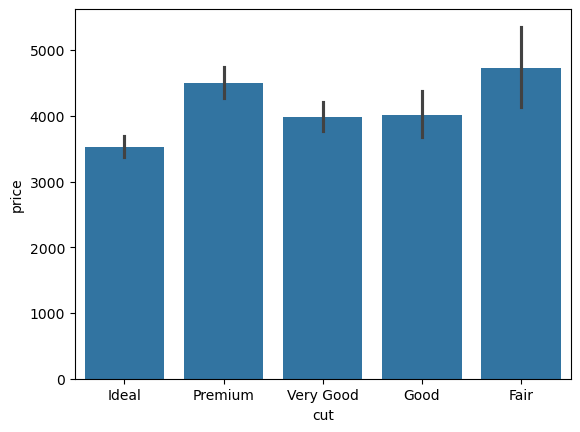

In [13]:
sns.barplot(x='cut', y='price', data=df)

In [14]:
# Bar plot for average price per cut category
fig = px.bar(df, x='cut', y='price', 
             title='Average Price by Cut', color='cut')
fig.show()

In [15]:
df_stats = df.groupby('clarity')['price'].agg(['mean', 'std']).reset_index()
df_stats.head()

# Bar plot for average price per cut category
fig = px.bar(df_stats, x='clarity', y='mean', error_y='std', 
             title='Average Price by Cut', color='clarity')
fig.show()

In [16]:
# histogram
fig = px.histogram(df, x='price', nbins=50,  
                   title='Price Distribution')
fig.show()

In [17]:
# histogram
fig = px.histogram(df, x='price', nbins=50, color='cut', 
                   title='Price Distribution')
fig.show()

In [18]:
# density contour plot
fig = px.density_contour(df, x='carat', y='price', 
                         title='Density Contour Plot')
fig.show()

In [19]:
# box plot
fig = px.box(df, x='cut', y='price', 
             title='Price Distribution by Cut')
fig.show()

In [23]:
# box plot
fig = px.box(df, x='cut', y='price',
             # outliers
            points='outliers', # 'outliers', 'suspectedoutliers'
            title='Price Distribution by Cut')

In [24]:
# box plot
fig = px.box(df, x='cut', y='price', color='clarity',
             # outliers
            points='suspectedoutliers', # 'outliers', 'suspectedoutliers'
            title='Price Distribution by Cut',
            labels={'price':'Price ($)', 'cut':'Cut', 'clarity':'Clarity'}
            )
fig.show()

In [25]:
# violin plot
fig = px.violin(df, x='cut', y='price', 
                # color='clarity',
             # outliers
            points='suspectedoutliers', # 'outliers', 'suspectedoutliers'
            title='Price Distribution by Cut',
            labels={'price':'Price ($)', 'cut':'Cut', 
                    # 'clarity':'Clarity'
                    }
            )
fig.show()

In [26]:
# facet scatter plot by clarity
fig = px.scatter(df, x='carat', y='price', 
                 color='cut', 
                 facet_col='clarity',
                 title='Price vs Carat by Cut and Clarity',)
fig.show()

In [27]:
# facet scatter plot by clarity
fig = px.scatter(df, x='carat', y='price', 
                color='cut', 
                size='price',
                facet_col='clarity',
                 # animate by cut
                animation_frame='cut', 
                title='Price vs Carat by Cut and Clarity',)
fig.show()

In [28]:
# Density heatmap of carat and price
fig = px.density_heatmap(df, x='carat', y='price', 
                         title='Density Heatmap of Carat vs Price')
fig.show()

# Subplots

In [29]:
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Carat vs Price', 
                                    'Density Heatmap of Carat vs Price'))

# Scatter plot of carat vs price
scatter = px.scatter(df, x='carat', y='price').data[0]
fig.add_trace(scatter, row=1, col=1)

# Density heatmap of carat vs price
heatmap = px.density_heatmap(df, x='carat', y='price').data[0]
fig.add_trace(heatmap, row=1, col=2)

# Update layout
fig.update_layout(title_text='Carat vs Price and Density Heatmap of Carat vs Price')
fig.show()

In [30]:
# creat heatmap of correlation matrix of only numerical columns
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
corr

carat     depth     table     price         x         y         z
carat  1.000000  0.025077  0.167961  0.921045  0.977872  0.977024  0.847328
depth  0.025077  1.000000 -0.290898 -0.008800 -0.025174 -0.028279  0.086228
table  0.167961 -0.290898  1.000000  0.116569  0.180099  0.173648  0.113192
price  0.921045 -0.008800  0.116569  1.000000  0.887243  0.889251  0.765929
x      0.977872 -0.025174  0.180099  0.887243  1.000000  0.998270  0.861521
y      0.977024 -0.028279  0.173648  0.889251  0.998270  1.000000  0.861205
z      0.847328  0.086228  0.113192  0.765929  0.861521  0.861205  1.000000

In [31]:
# creat heatmap of correlation matrix of only numerical columns
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
fig = go.Figure(data=go.Heatmap(x=corr.index.values, 
                                y=corr.columns.values, 
                                z=corr.values, 
                                colorscale='Viridis')) 
# colorscale can be 'Viridis', 'Cividis', 'Blues', 'Greens', 'Reds', 'Oranges', 'YlOrRd', 'YlGnBu', 'RdBu', 'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth', 'Electric', 'Plasma', 'Magma', 'Inferno', 'Cividis'
fig.show()

# 3D plots

In [32]:
# 3D scatter plot
fig = px.scatter_3d(df, 
                    x='carat', 
                    y='depth', 
                    z='price', 
                    color='cut', 
                    title='3D Scatter Plot of Carat, Depth, and Price')
fig.show()

In [33]:
# 3d line plot
fig = px.line_3d(df, x='carat', y='depth', z='price', color='cut')
fig.show()

In [34]:
# 3D scatter plot
fig = px.scatter_3d(df, 
                    x='carat', 
                    y='depth', 
                    z='cut', 
                    color='price', 
                    title='3D Scatter Plot of Carat, Depth, and Price')
fig.show()